# WG Probabilistic Results Processing: Frio Basin Observed to LOCA2

The purpose of this notebook is to process weather generator results into Climate Normals and cones of uncertainty for comparison with CMIP projections and historical observations.

## Imports and Parameters

In [1]:
%matplotlib inline

In [2]:
import os
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats as sstats
from math import exp
import datetime as dt
import pickle
from copy import deepcopy

In [3]:
BasKey = "Frio"

In [4]:
NumReal = 1000

In [5]:
plt.rcParams['svg.fonttype'] = 'none'

In [6]:
IN_DIR1 = r'C:\Users\nmartin\Documents\EAA_Drought_Future_Weather\NumModels\Final\%s\Results\Simulated' % BasKey
IN_DIR2 = r'C:\Users\nmartin\Documents\EAA_HCP\Data\SwRI_Processed\LOCA2'
IN_DIR3 = r'C:\Users\nmartin\Documents\EAA_HCP\Data\SwRI_Processed\Processed_Historical'
IN_DIR4 = r'C:\Users\nmartin\Documents\EAA_HCP\Data\SwRI_Processed\LOCA2\Cones_of_Uncertainty'
OUT_DIR = r'C:\Users\nmartin\Documents\EAA_Drought_Future_Weather\NumModels\Final\%s\Results\Processed' % BasKey

In [7]:
CNStartTS = pd.Timestamp( 2031, 1, 1, )
CNStopTS = pd.Timestamp( 2060, 12, 31, 23, 59, )
CNMonIndexer = pd.date_range( start=CNStartTS, end=CNStopTS, freq='MS' )
len( CNMonIndexer )

360

In [8]:
CUStartTS = pd.Timestamp( 2025, 1, 1, )
CUStopTS = pd.Timestamp( 2065, 12, 31, 23, 59, )
CUYearsIndexer = [ pd.Timestamp(x, 7, 1, 0) for x in range(CUStartTS.year, CUStopTS.year + 1) ]
len( CUYearsIndexer )

41

In [9]:
fillIndexer = deepcopy( CUYearsIndexer )
fillIndexer[0] = pd.Timestamp(2025, 1, 1, 0)
fillIndexer[len(fillIndexer)-1] = pd.Timestamp(2065, 12, 31, 23, 59, )

In [10]:
# make the Date indices
NumPolyPlotPts = len( fillIndexer )
NumPolyPlotPts

41

In [11]:
# make the time polygon list
DTTimeList = deepcopy( fillIndexer )
BackDTList = deepcopy( fillIndexer )
BackDTTL = BackDTList[::-1]
DTTimeList.extend( BackDTTL )

In [12]:
ColsList = list()
for cR in range(1, NumReal+1):
    ColsList.append( "R%04d" % cR )
# end for

In [13]:
OurQs = np.array( [ round( 0.05 * x, 2 ) for x in range(21) ], dtype=np.float32 )
NumQs = len( OurQs )
NumQs

21

In [14]:
InFiler = os.path.normpath( os.path.join( IN_DIR3, "CN1991to2020_Basin_DictDF.pkl" ) )
with open( InFiler, 'rb' )  as IF:
    CNObsBasinDict = pickle.load( IF )
# end with
ObsCN = CNObsBasinDict[BasKey]

In [15]:
InFiler = os.path.normpath( os.path.join( IN_DIR2, "CN2031_2060", "EnsAveCNDictnp.pkl" ) )
with open( InFiler, 'rb' ) as IF:
    L2CNBasinDict = pickle.load( IF )
# end with
L2CN = L2CNBasinDict[BasKey]

In [16]:
ProjFileRoot = "%s_R%d_DF.pickle"
MonIndexer = [ x for x in range(1,13,1)]

In [17]:
TSTicks = [ pd.Timestamp( 2015, 1, 1, ), pd.Timestamp( 2020, 1, 1, ), pd.Timestamp( 2025, 1, 1, ), pd.Timestamp( 2030, 1, 1, ), 
            pd.Timestamp( 2035, 1, 1, ), pd.Timestamp( 2040, 1, 1, ), pd.Timestamp( 2045, 1, 1, ), pd.Timestamp( 2050, 1, 1, ), 
            pd.Timestamp( 2055, 1, 1, ), pd.Timestamp( 2060, 1, 1, ), pd.Timestamp( 2065, 1, 1, ), ]
TSLabels = [ 2015, 2020, 2025, 2030, 2035, 2040, 2045, 2050, 2055, 2060, 2065, ]

In [18]:
TempYVals = [ 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, ]
PreYVals = [ 0.0, 250.0, 500.0, 750.0, 1000.0, 1250.0, 1500.0, 1750.0, 2000.0 ]

## Plots

### Climate Normals

In [19]:
L2Pre = L2CN["Pre_mm"]
L2MaxT = L2CN["TMax_C"]
L2MinT = L2CN["TMin_C"]

In [20]:
bWidth = 0.30

In [21]:
monTLabels = [ "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

In [22]:
l2PreTicks = [ ( x + (0.5*bWidth)) for x in MonIndexer ]
obsPreTicks = [ ( x - (0.5*bWidth)) for x in MonIndexer ]

In [23]:
preTicks = [ 0.0, 50.0, 100.0, 150.0, 200.0, ]
tmpTicks = [ 0.0, 10.0, 20.0, 30.0, 40.0, ]

In [26]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "%s_ClimateNormals_wg2obs_2031to2060.svg" % BasKey ) )
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "%s_ClimateNormals_wg2obs_2031to2060.png" % BasKey ) )
OutPDF = os.path.normpath( os.path.join( OUT_DIR, "Plots", "%s_ClimateNormals_wg2obs_2031to2060.pdf" % BasKey ) )

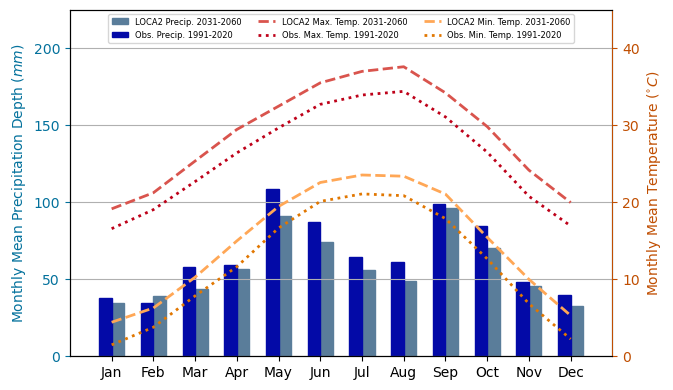

In [27]:
Fig1 = plt.figure()
Fig1.set_size_inches(7.0, 4.5)
ax11 = Fig1.add_subplot(111)
l2Pre = ax11.bar( l2PreTicks, L2Pre, bWidth, color='xkcd:steel blue', edgecolor='xkcd:steel blue',
                  label="LOCA2 2031-2060" )
obsPre = ax11.bar( obsPreTicks, ObsCN["Pre_mm"], bWidth, color='xkcd:cobalt blue', edgecolor='xkcd:cobalt blue',
                   label="Obs. 1991-2020" )
ax11.set_xticks( MonIndexer )
ax11.set_yticks( preTicks )
ax11.set_xticklabels( monTLabels, minor=False, rotation=0 )
ax11.set_ylabel('Monthly Mean Precipitation Depth ($mm$)', fontsize=10, color='xkcd:ocean blue')
ax11.set_xlim( (0.0, 13.0) )
#ax11.set_ylim( (preTicks[0], preTicks[len(preTicks)-1]) )
ax11.set_ylim( (preTicks[0], 225.0) )
ax11.tick_params(axis='both', which='major', labelsize=10)
ax11.tick_params(axis='y', colors='xkcd:ocean blue')
ax11.spines["right"].set_color('xkcd:ocean blue')
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
# second plot - temperatures
ax21 = ax11.twinx()
l2MxT, = ax21.plot( MonIndexer, L2MaxT, linestyle='dashed', linewidth=2, color='xkcd:pale red',
                    label="LOCA2 Max. Temp. 2031-2060" )
obsMxT, = ax21.plot( ObsCN.index, ObsCN["MaxT_C"], linestyle='dotted', linewidth=2, color='xkcd:scarlet',
                     label="Obs. Max. Temp. 1991-2020" )
l2MnT, = ax21.plot( MonIndexer, L2MinT, linestyle='dashed', linewidth=2, color='xkcd:pale orange',
                    label="LOCA2 Min. Temp. 2031-2060" )
obsMnT, = ax21.plot( ObsCN.index, ObsCN["MinT_C"], linestyle='dotted', linewidth=2, color='xkcd:pumpkin',
                     label="Obs. Min. Temp. 1991-2020" )
ax21.set_yticks( tmpTicks )
ax21.set_ylabel('Monthly Mean Temperature ($ ^{\circ} C$)', fontsize=10, color='xkcd:burnt orange')
ax21.spines["right"].set_color('xkcd:burnt orange')
#ax21.set_ylim( (tmpTicks[0], tmpTicks[len(tmpTicks)-1]) )
ax21.set_ylim( (tmpTicks[0], 45.0) )
ax21.tick_params(axis='y', which='major', labelsize=10, colors='xkcd:burnt orange')
ax11.legend( ( l2Pre, obsPre, 
               l2MxT, obsMxT, 
               l2MnT, obsMnT, ), 
             ( "LOCA2 Precip. 2031-2060", "Obs. Precip. 1991-2020", 
               "LOCA2 Max. Temp. 2031-2060", "Obs. Max. Temp. 1991-2020", 
               "LOCA2 Min. Temp. 2031-2060", "Obs. Min. Temp. 1991-2020", ),
             loc='upper center', fontsize=6, ncol=3 )
ax11.grid(visible=True, which='major', axis='y' )
ax21.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
Fig1.savefig( OutSVG, dpi=600.0 )
Fig1.savefig( OutPNG, dpi=600.0 )
Fig1.savefig( OutPDF, dpi=600.0 )

### Cones of Uncertainty

In [26]:
InFiler = os.path.normpath( os.path.join( IN_DIR4, "Cones_of_Uncertainty_LOCA2_ssp585_2025to2065.xlsx" ) )

In [27]:
L2Pre = pd.read_excel( InFiler, sheet_name="%s_Pre_Stats" % BasKey, header=0, index_col=0, parse_dates=True )
L2Tmp = pd.read_excel( InFiler, sheet_name="%s_Temp_Stats" % BasKey, header=0, index_col=0, parse_dates=True )

In [28]:
display( HTML( L2Pre.head().to_html() ) )

,q0.00,q0.05,q0.10,q0.15,q0.20,q0.25,q0.30,q0.35,q0.40,q0.45,q0.50,q0.55,q0.60,q0.65,q0.70,q0.75,q0.80,q0.85,q0.90,q0.95,q1.00,Mean,StDev
DateTime,,,,,,,,,,,,,,,,,,,,,,,
2025-07-01,502.680450,508.465546,547.117493,578.638428,592.846008,606.242065,615.064880,631.075073,646.426025,654.047852,664.121460,680.291565,689.626160,706.205994,735.115540,741.228210,771.201050,817.451538,863.366638,950.866211,1019.907837,690.981384,133.574341
2026-07-01,302.051910,471.509155,480.910461,507.506256,562.846863,583.839355,597.934631,606.235352,653.698059,678.263428,691.195251,695.028992,702.111267,725.819397,781.841248,814.515320,842.782410,862.006653,878.825317,918.262390,924.701538,680.680725,162.412903
2027-07-01,357.514557,390.672974,442.555969,516.859192,529.110718,536.347412,565.090942,587.352905,632.408630,646.503601,680.265320,713.881226,716.479980,731.306946,760.680298,784.485718,819.209534,894.086365,1172.441406,1245.910278,1487.436035,722.612427,279.743317
2028-07-01,260.924530,457.280640,478.497253,505.845581,509.386536,528.875854,547.291199,584.482178,606.535156,614.405151,642.390198,711.960449,745.756531,777.867310,819.545959,825.290833,846.702209,867.327576,913.117859,1107.109009,1253.374634,695.086914,227.068359
2029-07-01,276.911560,450.816254,499.443451,514.603516,529.051392,541.489136,558.269897,578.706726,585.689819,593.334839,647.180603,659.484924,663.070312,672.332031,704.079651,737.784851,787.703186,878.350586,953.855774,1044.870483,1060.475586,663.722168,192.920044


In [29]:
display( HTML( L2Tmp.tail().to_html() ) )

,q0.00,q0.05,q0.10,q0.15,q0.20,q0.25,q0.30,q0.35,q0.40,q0.45,q0.50,q0.55,q0.60,q0.65,q0.70,q0.75,q0.80,q0.85,q0.90,q0.95,q1.00,Mean,StDev
DateTime,,,,,,,,,,,,,,,,,,,,,,,
2061-07-01,21.390886,21.471058,22.006718,22.254269,22.444284,22.533409,22.601299,22.748007,22.860220,22.975527,23.005838,23.186102,23.189507,23.273264,23.452761,23.466969,23.702345,23.923195,24.061928,24.201693,24.965263,23.032770,0.871294
2062-07-01,21.503027,21.861893,21.949995,21.971025,22.027964,22.256351,22.586906,22.702719,22.725052,22.920843,23.081228,23.152220,23.222612,23.285858,23.334747,23.360516,23.382072,23.501078,23.612707,23.957983,24.209906,22.885374,0.729325
2063-07-01,21.073677,21.312792,21.722048,21.961681,22.343664,22.402660,22.409611,22.474966,22.532276,22.922934,23.098068,23.167519,23.200605,23.267523,23.320696,23.441265,23.605259,23.888996,24.061913,24.116898,24.836563,22.911152,0.940626
2064-07-01,21.158180,21.750528,21.881054,22.241669,22.383430,22.446663,22.512650,22.557579,22.620205,22.698647,22.774202,22.822002,22.933275,22.964834,23.198357,23.572796,23.782492,23.994644,24.218117,24.347332,24.526669,22.924610,0.877525
2065-07-01,21.433146,21.813623,22.188700,22.341934,22.769941,22.936956,23.007805,23.050192,23.123060,23.257582,23.382545,23.545721,23.604322,23.658125,23.676083,23.777447,24.016403,24.131710,24.223347,24.382973,24.562773,23.282442,0.826264


In [30]:
InFiler = os.path.normpath( os.path.join( IN_DIR3, "FBas_MetTS_1980through2022_Dict.pkl" ) )
with open( InFiler, 'rb' )  as IF:
    ObsMetTSDict = pickle.load( IF )
# end with
ObsTS = ObsMetTSDict[BasKey]

In [31]:
display( HTML( ObsTS.head().to_html() ) )

,Pre_mm,MaxT_C,MinT_C,AveT_C,ETo_mm,Def_mm
1980-01-01,0.0,17.210241,-2.786118,7.212062,1.780014,-1.780014
1980-01-02,0.0,18.075875,0.884738,9.480307,1.946088,-1.946088
1980-01-03,0.0,14.485908,2.471285,8.478596,1.879541,-1.879541
1980-01-04,0.0,15.662555,-2.971982,6.345286,1.731770,-1.731770
1980-01-05,0.0,18.334945,-1.406646,8.464149,1.889346,-1.889346


In [32]:
display( HTML( ObsTS.tail().to_html() ) )

,Pre_mm,MaxT_C,MinT_C,AveT_C,ETo_mm,Def_mm
2022-12-27,0.000000,17.293683,-3.491563,6.901060,1.625996,-1.625996
2022-12-28,0.000000,23.094785,0.425724,11.760255,1.948373,-1.948373
2022-12-29,0.000000,21.290023,7.363784,14.326904,2.120935,-2.120935
2022-12-30,0.406542,19.376818,6.042651,12.709735,2.017561,-1.611019
2022-12-31,0.406542,19.376818,6.042651,12.709735,2.021597,-1.615055


In [33]:
AnnObsPreDF = ObsTS[["Pre_mm"]].resample( 'AS' ).sum()
AnnObsTempDF = ObsTS[["AveT_C"]].resample( 'AS' ).mean()

In [34]:
NewTimeIndexer = [ pd.Timestamp( x, 7, 1, ) for x in range( 1980, 2023 ) ]

In [35]:
AnnObsPreDF["NewIndexer"] = NewTimeIndexer
AnnObsTempDF["NewIndexer"] = NewTimeIndexer

In [36]:
AnnObsPreDF.set_index( "NewIndexer", inplace=True )
AnnObsTempDF.set_index( "NewIndexer", inplace=True )

In [37]:
AnnObsPreDF["10year"] = AnnObsPreDF["Pre_mm"].rolling(window=10,).mean()
AnnObsTempDF["5year"] = AnnObsTempDF["AveT_C"].rolling(window=5,).mean()

In [38]:
display( HTML( AnnObsPreDF.head().to_html() ) )

,Pre_mm,10year
NewIndexer,,
1980-07-01,685.889224,NaN
1981-07-01,1028.678974,NaN
1982-07-01,543.018086,NaN
1983-07-01,685.422590,NaN
1984-07-01,646.152534,NaN


In [39]:
display( HTML( AnnObsTempDF.tail().to_html() ) )

,AveT_C,5year
NewIndexer,,
2018-07-01,18.645146,18.806590
2019-07-01,18.732455,18.869132
2020-07-01,19.236113,19.036908
2021-07-01,19.947655,19.195355
2022-07-01,20.173494,19.346973


Build the plot polygons for cones of uncertainty

In [40]:
PQ5thList = L2Pre["q0.05"].tolist()
PQ25thList = L2Pre["q0.25"].tolist()
PQ75thList = L2Pre["q0.75"].tolist()
PQ95thList = L2Pre["q0.95"].tolist()

In [41]:
TQ5thList = L2Tmp["q0.05"].tolist()
TQ25thList = L2Tmp["q0.25"].tolist()
TQ75thList = L2Tmp["q0.75"].tolist()
TQ95thList = L2Tmp["q0.95"].tolist()

In [42]:
# 5th - 95th Envelope
PEnv5to95List = deepcopy( PQ5thList )
Back95List = deepcopy( PQ95thList )
Back95DTTL = Back95List[::-1]
PEnv5to95List.extend( Back95DTTL )

In [43]:
# 25th - 75th Envelope
PEnv25to75List = deepcopy( PQ25thList )
Back75List = deepcopy( PQ75thList )
Back75DTTL = Back75List[::-1]
PEnv25to75List.extend( Back75DTTL )

In [44]:
# 5th - 95th Envelope
TEnv5to95List = deepcopy( TQ5thList )
Back95List = deepcopy( TQ95thList )
Back95DTTL = Back95List[::-1]
TEnv5to95List.extend( Back95DTTL )

In [45]:
# 25th - 75th Envelope
TEnv25to75List = deepcopy( TQ25thList )
Back75List = deepcopy( TQ75thList )
Back75DTTL = Back75List[::-1]
TEnv25to75List.extend( Back75DTTL )

### Plots

In [46]:
OutPDF = os.path.normpath( os.path.join( OUT_DIR, "Plots", "%s_AveTmp_ConeUnc_obs2loca_2025to2065.pdf" % BasKey ) ) 
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "%s_AveTmp_ConeUnc_obs2loca_2025to2065.svg" % BasKey ) )
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "%s_AveTmp_ConeUnc_obs2loca_2025to2065.png" % BasKey ) )

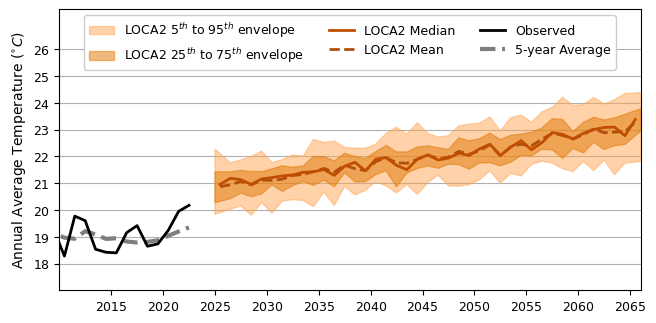

In [47]:
Fig1 = plt.figure()
Fig1.set_size_inches(7.5, 3.65)
ax11 = Fig1.add_subplot(1,1,1)
f5to95 = ax11.fill( DTTimeList, TEnv5to95List, color='xkcd:pale orange', alpha=0.50, 
                    label="LOCA2 $5^{th}$ to $95^{th}$ envelope", zorder=5 )
f25to75 = ax11.fill( DTTimeList, TEnv25to75List, color='xkcd:pumpkin', alpha=0.50, 
                     label="LOCA2 $25^{th}$ to $75^{th}$ envelope", zorder=8 )
med, = ax11.plot( L2Tmp.index, L2Tmp["q0.50"].tolist(), color='xkcd:burnt orange',
                  linestyle='-', linewidth=2.0, label="LOCA2 Median", zorder=11 )
ave, = ax11.plot( L2Tmp.index, L2Tmp["Mean"].tolist(), color='xkcd:burnt sienna',
                  linestyle='dashed', linewidth=2.0, label="LOCA2 Mean", zorder=10 )
obsA, = ax11.plot( AnnObsTempDF.index, AnnObsTempDF["AveT_C"], linewidth=2.0, label="Observed",
                   color='xkcd:black', linestyle='-', zorder=15 )
obsA10, = ax11.plot( AnnObsTempDF.index, AnnObsTempDF["5year"], linewidth=3.0, label="5-year Average",
                   color='xkcd:medium grey', linestyle='dashed', zorder=13 )
ax11.set_ylabel( r'Annual Average Temperature ($^{\circ}C$)', fontsize=10)
ax11.set_yticks( TempYVals )
ax11.set_xticks( TSTicks )
ax11.set_xticklabels( TSLabels )
ax11.grid( visible=True, which='major', axis='y' )
ax11.set_xlim( (pd.Timestamp(2010, 1, 1,), fillIndexer[len(fillIndexer)-1]) )
ax11.set_ylim( (17, 27.5 ) )
ax11.legend( loc='upper center', ncol=3, framealpha=1.0, fontsize=9)
ax11.tick_params(axis='both', which='major', labelsize=9)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
Fig1.savefig( OutPDF, dpi=600.0 )
Fig1.savefig( OutSVG, dpi=600.0 )
Fig1.savefig( OutPNG, dpi=600.0 )

In [48]:
OutPDF = os.path.normpath( os.path.join( OUT_DIR, "Plots", "%s_PreDep_ConeUnc_obs2loca_2025to2065.pdf" % BasKey ) ) 
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "%s_PreDep_ConeUnc_obs2loca_2025to2065.svg" % BasKey ) )
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "%s_PreDep_ConeUnc_obs2loca_2025to2065.png" % BasKey ) )

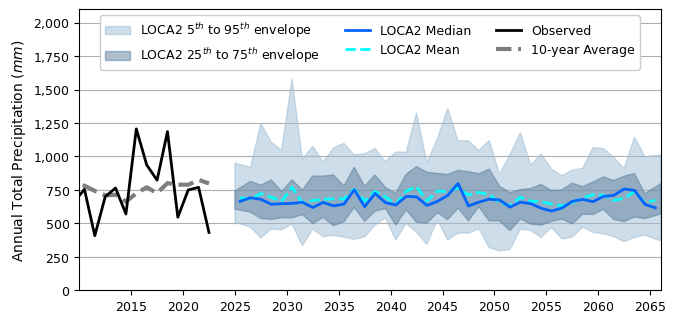

In [49]:
Fig1 = plt.figure()
Fig1.set_size_inches(7.5, 3.65)
ax11 = Fig1.add_subplot(1,1,1)
f5to95 = ax11.fill( DTTimeList, PEnv5to95List, color='xkcd:light grey blue', alpha=0.50, 
                    label="LOCA2 $5^{th}$ to $95^{th}$ envelope", zorder=5 )
f25to75 = ax11.fill( DTTimeList, PEnv25to75List, color='xkcd:steel blue', alpha=0.50, 
                     label="LOCA2 $25^{th}$ to $75^{th}$ envelope", zorder=8 )
med, = ax11.plot( L2Pre.index, L2Pre["q0.50"].tolist(), color='xkcd:bright blue',
                  linestyle='-', linewidth=2.0, label="LOCA2 Median", zorder=11 )
ave, = ax11.plot( L2Pre.index, L2Pre["Mean"].tolist(), color='xkcd:cyan',
                  linestyle='dashed', linewidth=2.0, label="LOCA2 Mean", zorder=10 )
obsA, = ax11.plot( AnnObsPreDF.index, AnnObsPreDF["Pre_mm"], linewidth=2.0, label="Observed",
                   color='xkcd:black', linestyle='-', zorder=15 )
obsA10, = ax11.plot( AnnObsPreDF.index, AnnObsPreDF["10year"], linewidth=3.0, label="10-year Average",
                   color='xkcd:medium grey', linestyle='dashed', zorder=13 )
ax11.set_ylabel( r'Annual Total Precipitation ($mm$)', fontsize=10)
ax11.set_yticks( PreYVals )
ax11.set_xticks( TSTicks )
ax11.set_xticklabels( TSLabels )
ax11.grid( visible=True, which='major', axis='y' )
ax11.set_xlim( (pd.Timestamp(2010, 1, 1,), fillIndexer[len(fillIndexer)-1]) )
ax11.set_ylim( (PreYVals[0], 2100) )
ax11.legend( loc='upper center', ncol=3, framealpha=1.0, fontsize=9)
ax11.tick_params(axis='both', which='major', labelsize=9)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
Fig1.savefig( OutPDF, dpi=600.0 )
Fig1.savefig( OutSVG, dpi=600.0 )
Fig1.savefig( OutPNG, dpi=600.0 )